# Networks

- Notebook to exercise statistics distributions relevant for Turtles

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Wed May  6 11:44:45 2020


In [2]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [3]:
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import expon

In [4]:
from networkx import *

# Erdos-Renyi graph 

- The classic Erdos-Renyi network: Each of the possible N(N − 1)/2 links among the N edges is activated randomly with probability p. This is well understood mathematically. They are not scale free networks (the degree distribution is Poisson). They are small-world networks. They show a very small clustering coefficient.

In [36]:
er=nx.erdos_renyi_graph(100,0.15)

In [37]:
D = [degree(er,n) for n in nodes(er)]
C= [clustering(er,n) for n in nodes(er)]

(array([ 1.,  6.,  9., 10., 20., 20., 10., 16.,  4.,  4.]),
 array([ 6. ,  7.7,  9.4, 11.1, 12.8, 14.5, 16.2, 17.9, 19.6, 21.3, 23. ]),
 <a list of 10 Patch objects>)

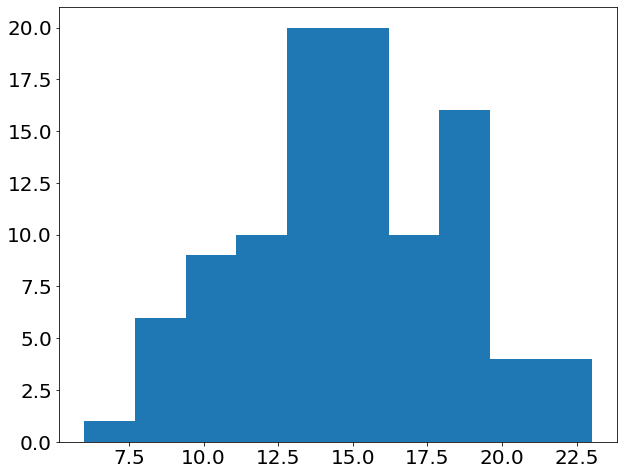

In [38]:
plt.hist(D)

(array([ 2., 12., 38., 30., 14.,  2.,  1.,  0.,  0.,  1.]),
 array([0.04545455, 0.08090909, 0.11636364, 0.15181818, 0.18727273,
        0.22272727, 0.25818182, 0.29363636, 0.32909091, 0.36454545,
        0.4       ]),
 <a list of 10 Patch objects>)

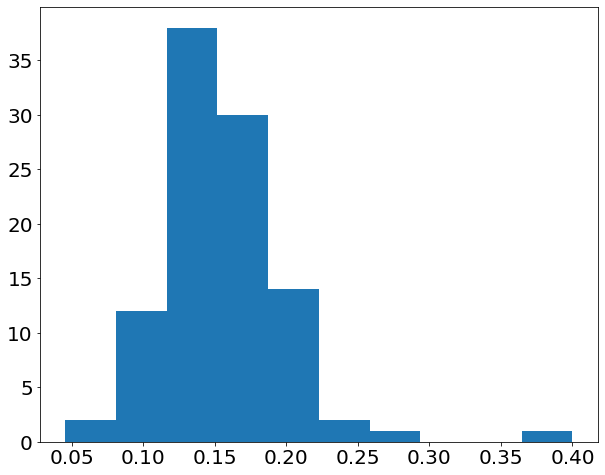

In [39]:
plt.hist(C)

(array([11.,  0.,  2.,  1.,  2.,  0.,  3.,  0.,  4.,  1.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

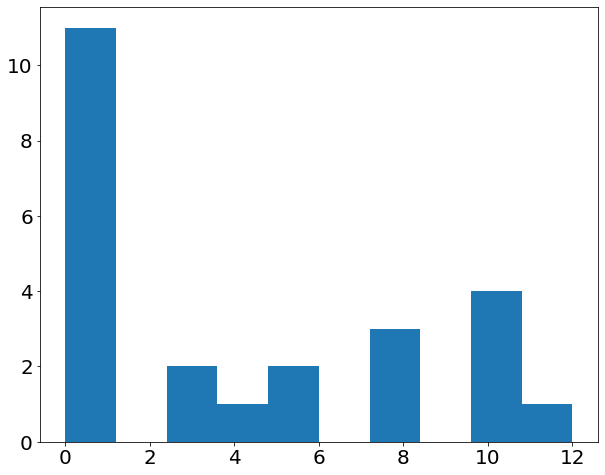

In [40]:
plt.hist(degree_histogram(er))

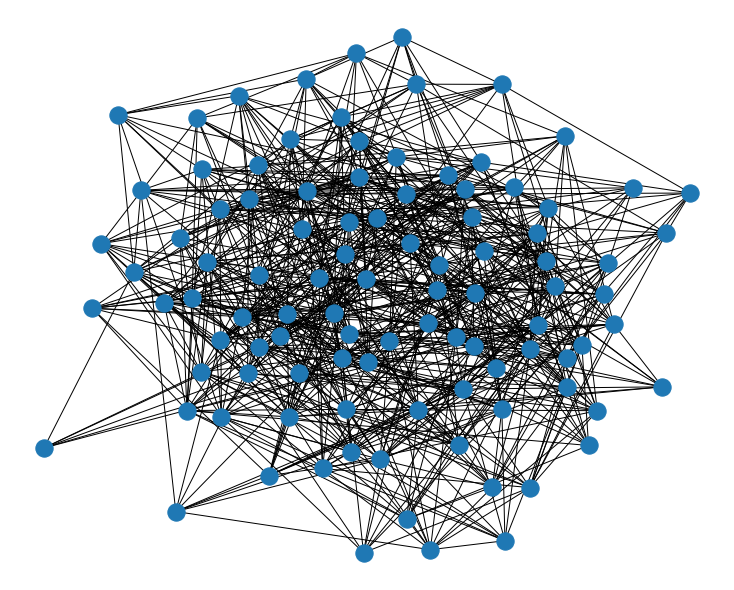

In [41]:
nx.draw(er)

In [45]:
def degree_and_clustering(g):
    D = [degree(g,n) for n in nodes(g)]
    C= [clustering(g,n) for n in nodes(g)]
    return D, C

# The Watts-Strogatz model 

- shows that the small world property can be present in graphs with high clustering coefficient (https://www.nature.com/articles/30918). Still the degree distribution is not power law in these models.

In [61]:
ws=nx.watts_strogatz_graph(30,10,0.1)
D, C = degree_and_clustering(ws)

(array([8., 0., 1., 2., 1., 0., 0., 0., 0., 1.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

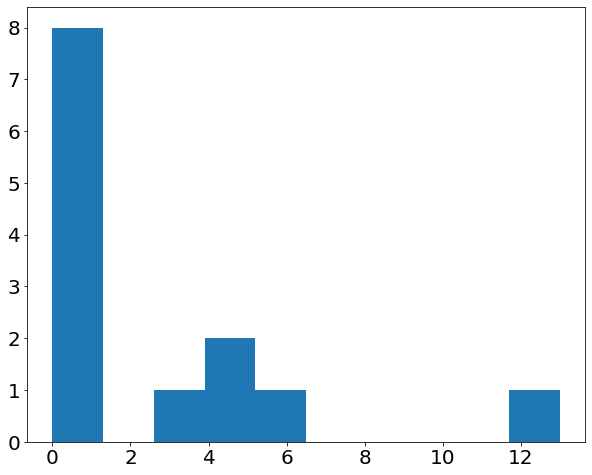

In [62]:
plt.hist(degree_histogram(ws))

(array([ 4.,  0.,  4.,  0.,  0., 13.,  0.,  6.,  0.,  3.]),
 array([ 8. ,  8.4,  8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. ]),
 <a list of 10 Patch objects>)

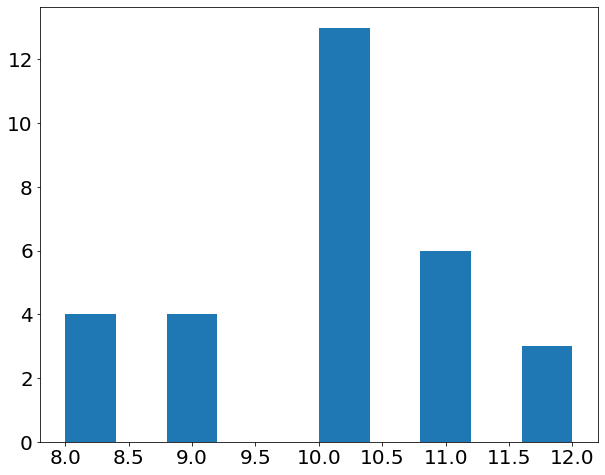

In [64]:
plt.hist(D)

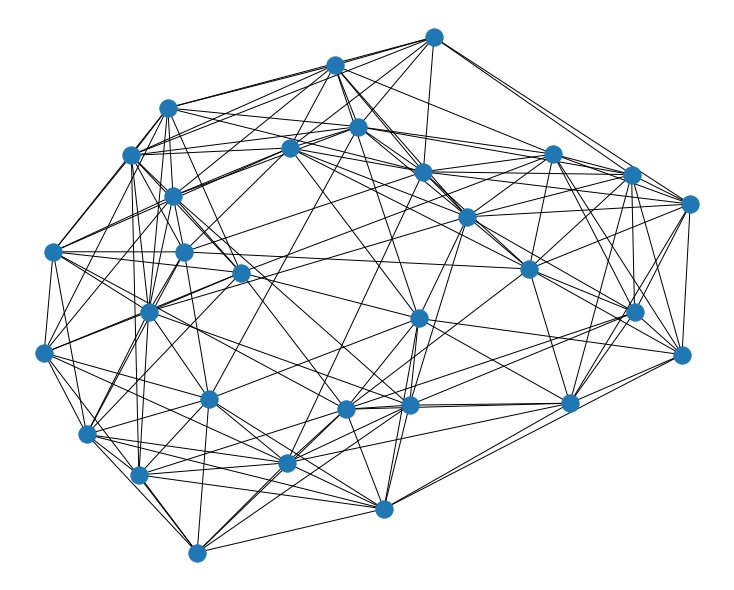

In [65]:
nx.draw(ws)

# TheBarabasi-Albertwork(https://arxiv.org/abs/cond-mat/9910332)

- showed that preferential attachment and growth are some elements that can produce scale-free networks. This model has the small worls property, but is still a random network with very small clustering.


In [55]:
ba=nx.barabasi_albert_graph(100,5)
D, C = degree_and_clustering(ba)

(array([31.,  3.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

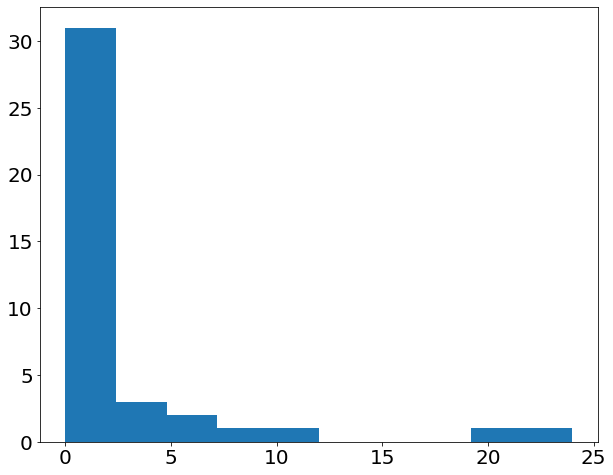

In [56]:
plt.hist(degree_histogram(ba))

(array([ 9.,  9., 30., 14., 16., 10.,  2.,  0.,  7.,  3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

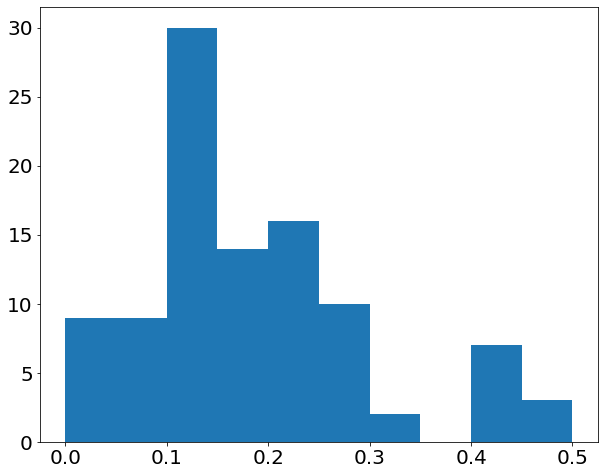

In [57]:
plt.hist(C)

(array([62., 18.,  7.,  2.,  4.,  3.,  2.,  1.,  0.,  1.]),
 array([ 5. ,  8.4, 11.8, 15.2, 18.6, 22. , 25.4, 28.8, 32.2, 35.6, 39. ]),
 <a list of 10 Patch objects>)

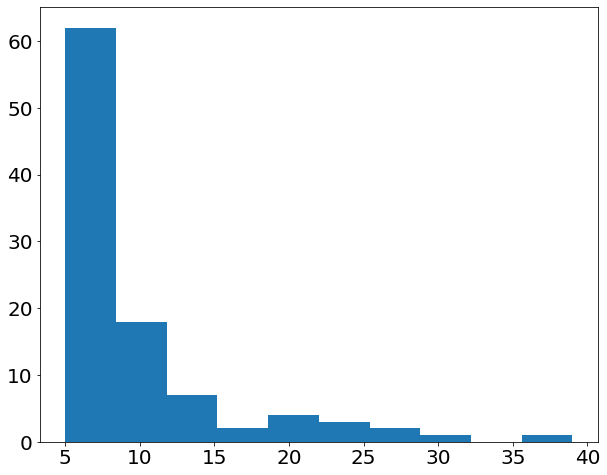

In [59]:
plt.hist(D)

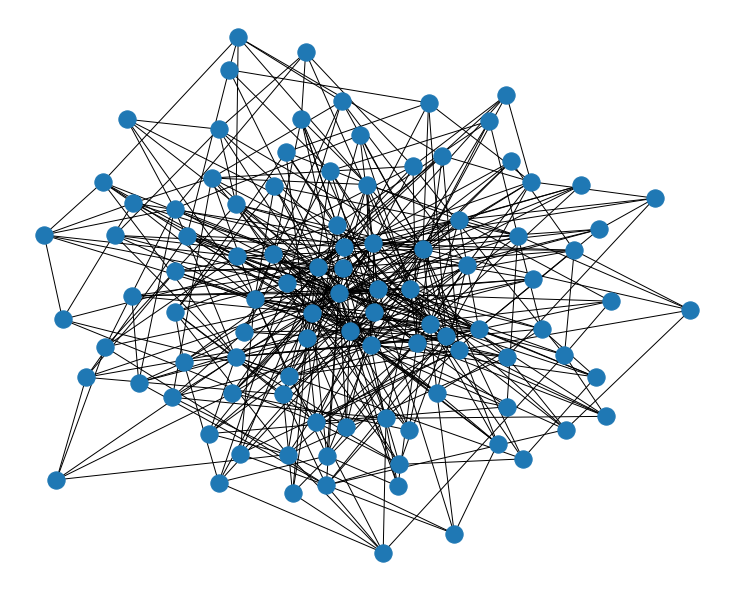

In [60]:
nx.draw(ba)

In [6]:
print("node degree clustering")
for v in nodes(G):
    print('%s %d %f' % (v,degree(G,v),clustering(G,v)))

node degree clustering
0 2 0.000000
1 4 0.333333
2 4 0.666667
3 3 0.666667
4 5 0.400000
5 4 0.666667
6 8 0.357143
7 4 0.666667
8 3 0.666667
9 3 0.333333


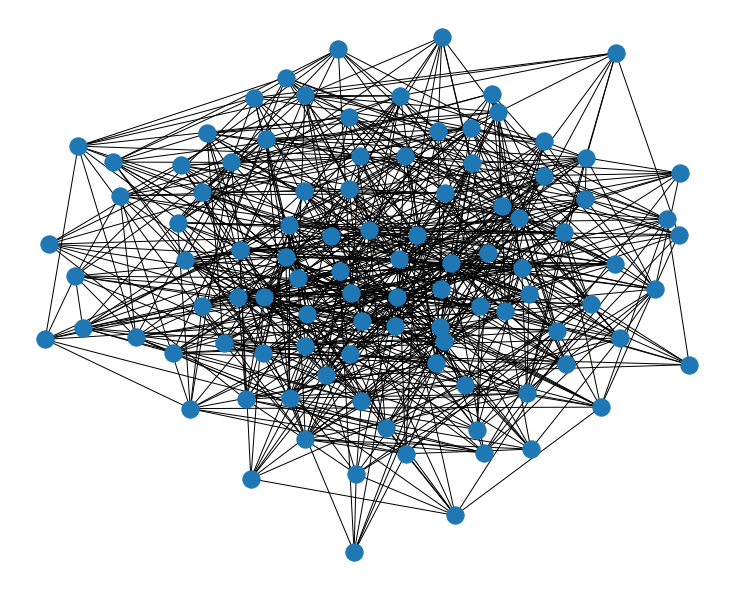

In [30]:
nx.draw(er)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

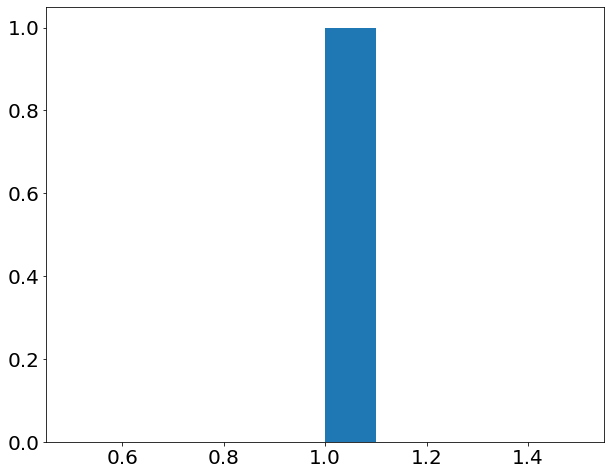

In [12]:
plt.hist(degree(G,v))